<a href="https://colab.research.google.com/github/vishnuaswanth/ML_projects/blob/main/Copy_of_M3_MP2_NB_HeartDisease_Classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project 02 : HeartDisease_Classification

### Dataset Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Attribute Information:

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [ ]:
#@title Download dataset
!gdown "1d38QsG8ZkYBBZKllqkBknUxC4xZiGob7"

Downloading...
From: https://drive.google.com/uc?id=1d38QsG8ZkYBBZKllqkBknUxC4xZiGob7
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 46.4MB/s]


### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,roc_curve, auc

In [ ]:
# read the data
ds = pd.read_csv('heart.csv')

In [ ]:
# Print the top 5 data points
print(ds.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


### Data Exploration (2 Marks)

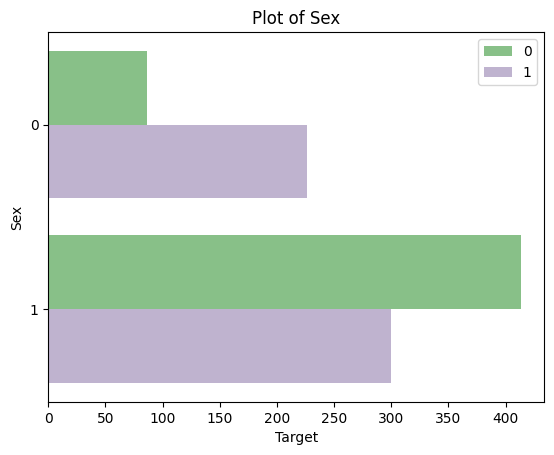

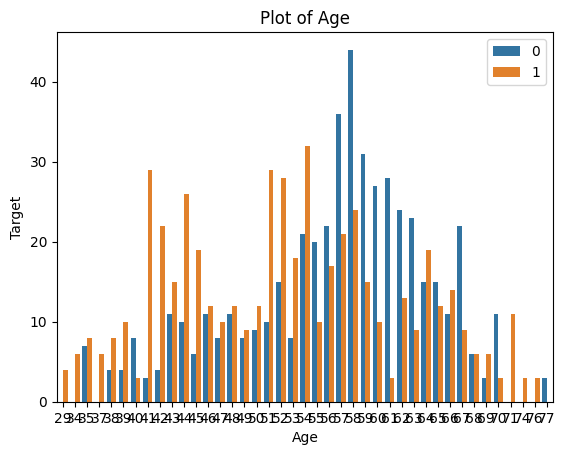

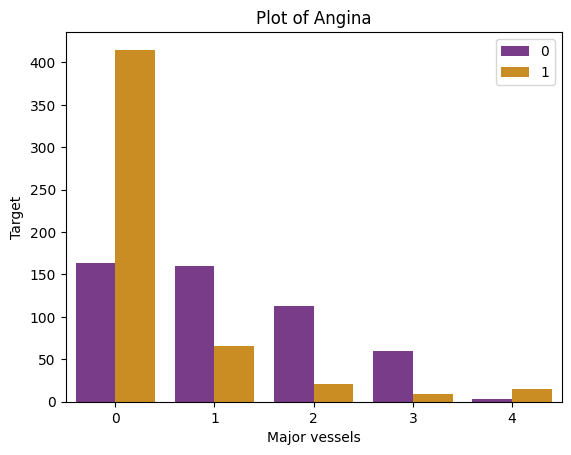

In [ ]:
# Create a countplot using Seaborn's countplot function to visualize the distribution of the 'target' variable in the DataFrame
sns.countplot(y ='sex',hue = 'target', data = ds,palette='Accent')
plt.title("Plot of Sex")
plt.xlabel("Target")
plt.ylabel("Sex")
plt.legend()
plt.show()

sns.countplot(x='age',hue='target',data=ds)
plt.title("Plot of Age")
plt.ylabel("Target")
plt.xlabel("Age")
plt.legend()
plt.show()

sns.countplot(x='ca',hue="target",data=ds,palette="CMRmap")
plt.title("Plot of Angina")
plt.ylabel("Target")
plt.xlabel("Major vessels")
plt.legend()
plt.show()



Analyze and report the percentage of patients with and without heart disease based on a given dataset. Calculate the percentage of patients who haven't heart disease and the percentage of patients who have heart disease in the dataset.

In [ ]:
# Analyze and report the percentage of patients with and without heart disease based on a given dataset.
# Calculate the percentage of patients who haven't heart disease and the percentage of patients who have heart disease in the dataset.


In [ ]:


print(len(ds))
ds.shape
print("description of dataset:\n")
print(ds.describe())
#print("duplicate values",ds.duplicated(subset=["review", "rating"]).sum())


1025
description of dataset:

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.0000

In [ ]:
print("summary of dataset:\n")
ds.info()
#CHECK FOR NULL VALUES
ds.isna().sum()


summary of dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

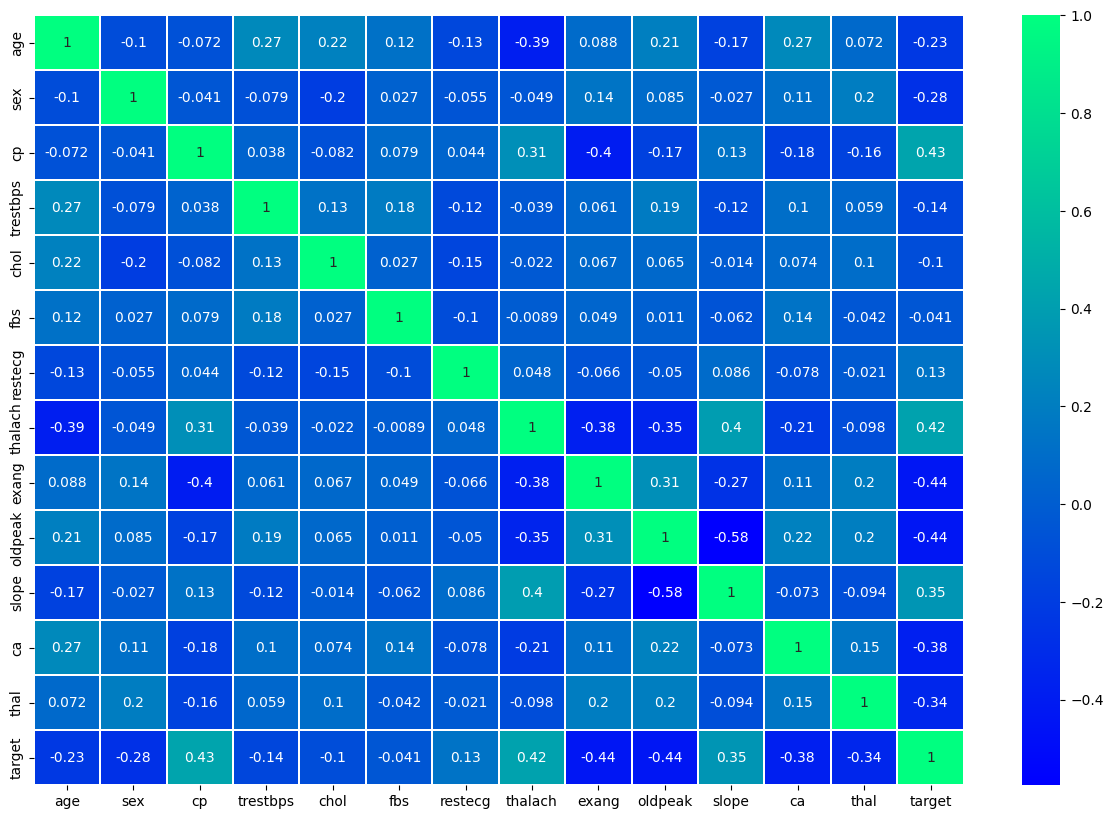

<Figure size 640x480 with 0 Axes>

In [ ]:
#Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(ds.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlation Matrix')
#The Below correlation figure ,we infer Chest pain,Thal Achieved and Slope values are positively correlated with target.High chest pain increases the rate of hear disease
#Excercise induced Angina,Old peak,Thal,ca are negatively correlated with target

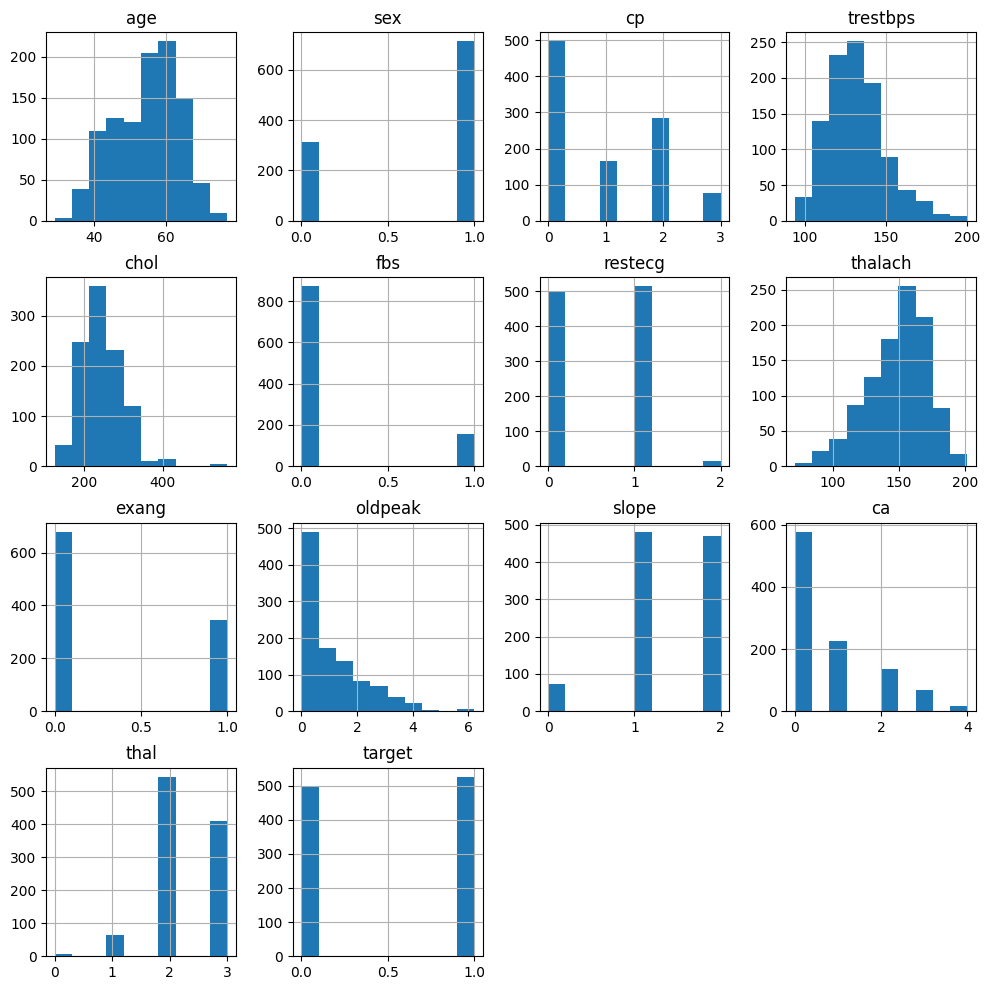

In [ ]:

#HISTOGRAM
ds.hist(figsize=(12,12))
plt.savefig('featuresplot')

Count the percentage of Male and Female patients

sex
1    713
0    312
Name: count, dtype: int64


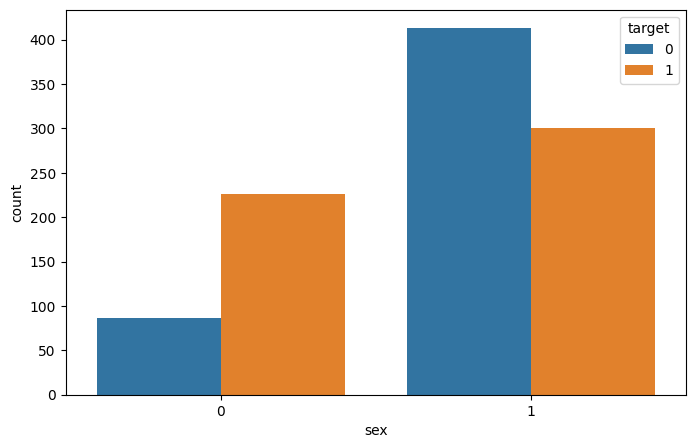

In [ ]:
# YOUR CODE HERE : Count the percentage of Male and Female patients
print(ds.sex.value_counts())
fig,ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(x='sex',hue='target',data=ds)


In [ ]:
ds.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


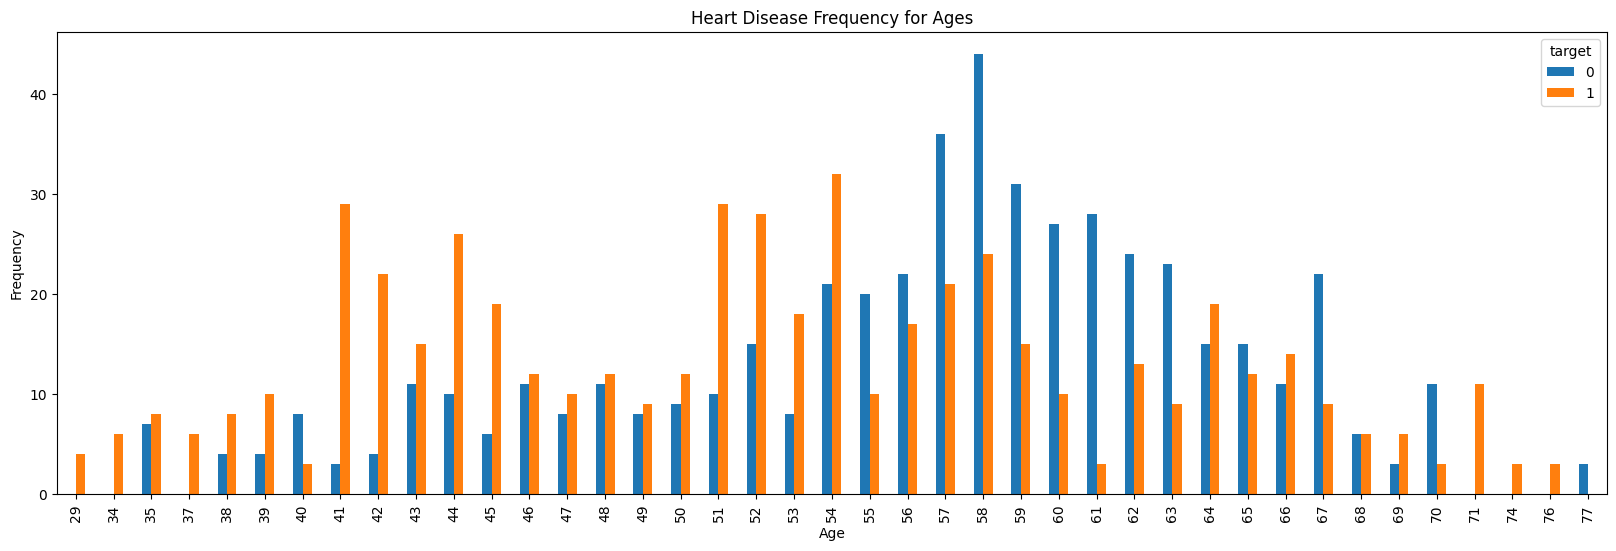

In [ ]:
pd.crosstab(ds.age,ds.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

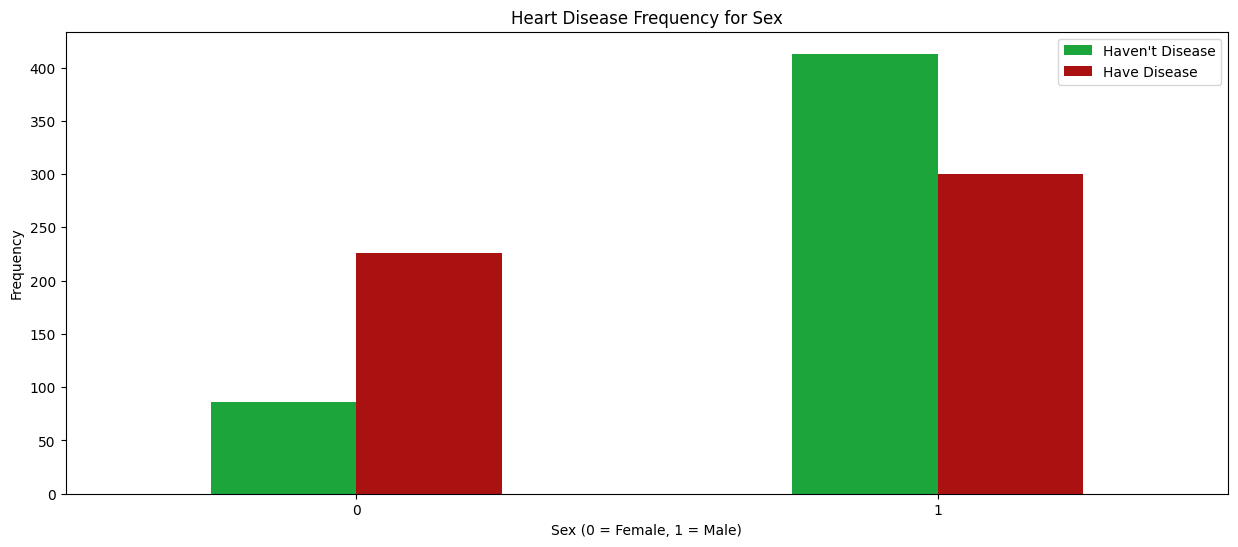

In [ ]:
pd.crosstab(ds.sex,ds.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
# YOUR CODE HERE : Create a scatter plot to visualize the relationship between a patient's age and their maximum heart rate based on a given dataset.


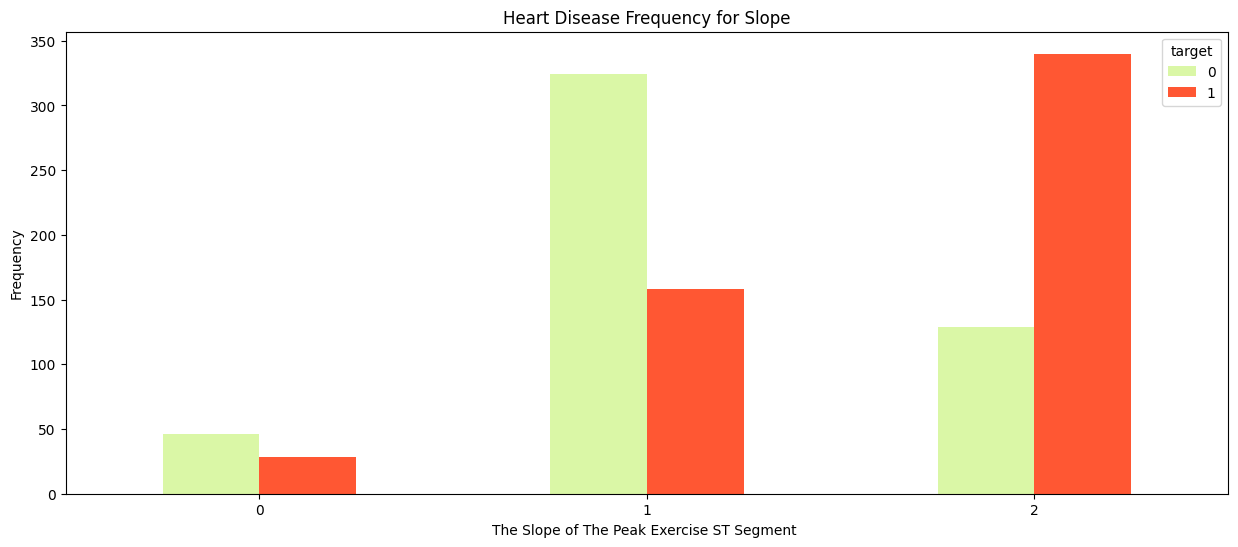

In [ ]:
pd.crosstab(ds.slope,ds.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

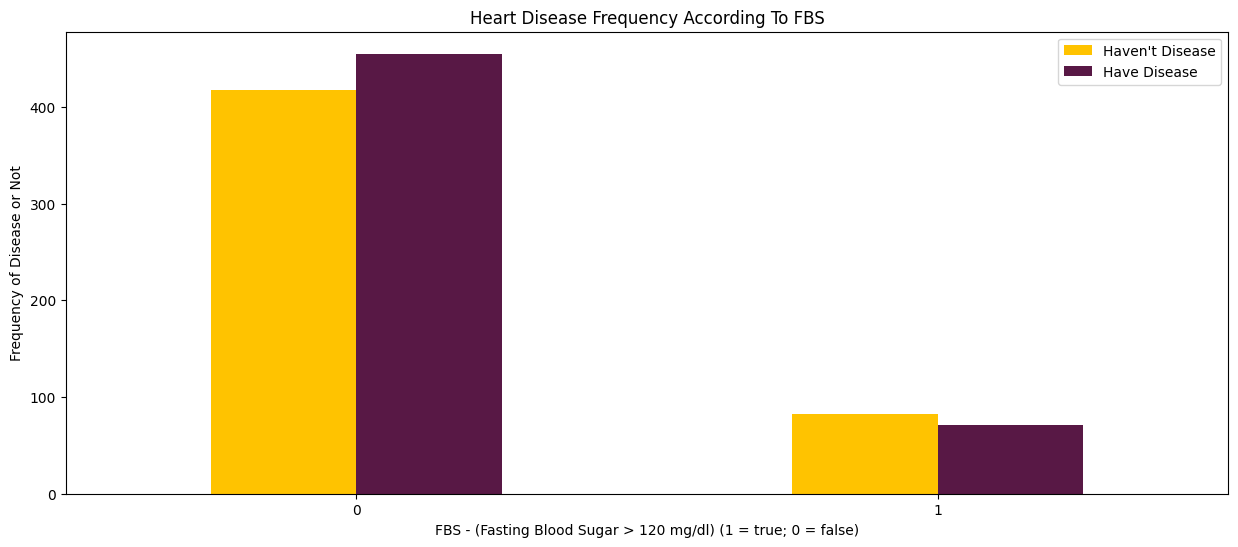

In [ ]:
pd.crosstab(ds.fbs,ds.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()


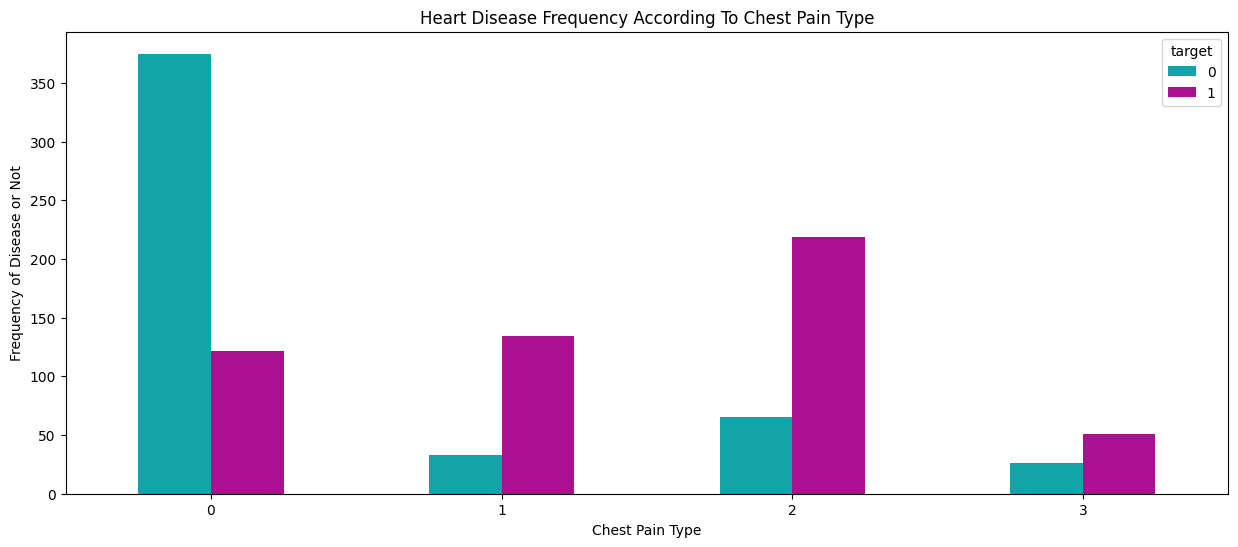

In [ ]:
pd.crosstab(ds.cp,ds.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy Variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [ ]:
#a = pd.get_dummies(df['cp'], prefix = "cp")
#b = pd.get_dummies(df['thal'], prefix = "thal")
#c = pd.get_dummies(df['slope'], prefix = "slope")

In [ ]:
#frames = [df, a, b, c]
#df = pd.concat(frames, axis = 1)
#df.head()

In [ ]:
#df = df.drop(columns = ['cp', 'thal', 'slope'])
#df.head()

### Creating Model


In [ ]:
X=ds.drop(['target'],axis=1)
y=ds['target']



### Normalize Data ( 1 Mark)

In [ ]:
# YOUR CODE HERE: Normalize the data
#Normalize data
X=((X-np.min(X))/(np.max(X)-np.min(X))).values
y=((y-np.min(y))/(np.max(y)-np.min(y))).values


In [ ]:
# YOUR CODE HERE : Train test split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [ ]:
#transpose matrices
#x_train = x_train.T
#y_train = y_train.T
#x_test = x_test.T
#y_test = y_test.T

### Logistic Regression (1 Mark)

Testing Accuracy for Logistic Regression: 0.6575875486381323
Testing Sensitivity for Logistic Regression: 0.6732673267326733
Testing Specificity for Logistic Regression: 0.6474358974358975
Testing Precision for Logistic Regression: 0.5528455284552846


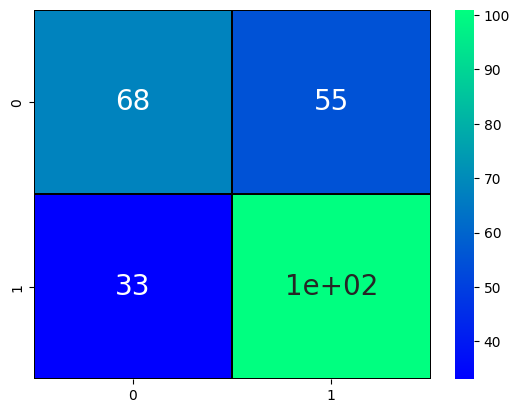

In [ ]:
# YOUr CODE HERE : Perform binary classification using Logistic Regression and calculate the accuracy of the model on a test dataset.
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
pred1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,pred1)
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
lr_acc = accuracy_score(y_test, pred1)
fpr, tpr, thresholds = roc_curve(y_test, pred1)
roc_auc = auc(fpr, tpr)


print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [ ]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

         0.0       0.67      0.55      0.61       123
         1.0       0.65      0.75      0.70       134

    accuracy                           0.66       257
   macro avg       0.66      0.65      0.65       257
weighted avg       0.66      0.66      0.65       257



### K-Nearest Neighbour (KNN) Classification ( 1 Mark)

Testing Accuracy for KNN: 0.7198443579766537
Testing Sensitivity for KNN: 0.6976744186046512
Testing Specificity for KNN: 0.7421875
Testing Precision for KNN: 0.7317073170731707
              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71       123
         1.0       0.74      0.71      0.73       134

    accuracy                           0.72       257
   macro avg       0.72      0.72      0.72       257
weighted avg       0.72      0.72      0.72       257



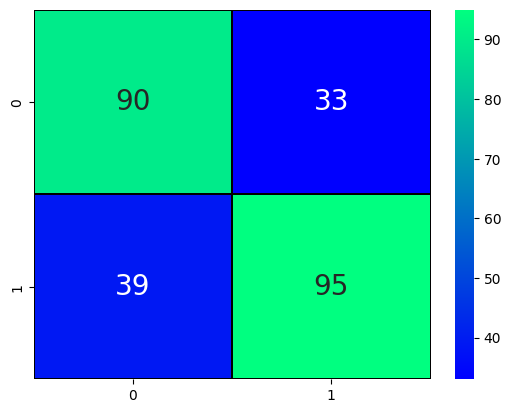

In [ ]:
# YOUR CODE HERE : Perform binary classification using the k-Nearest Neighbors (KNN) algorithm and calculate the accuracy of the model on a test dataset.
knn = KNeighborsClassifier(n_neighbors=5)

model2=knn.fit(X_train, y_train)
pred2=model2.predict(X_test)

cm2=confusion_matrix(y_test,pred2)
sns.heatmap(cm2, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm2[0][0]
TN=cm2[1][1]
FN=cm2[1][0]
FP=cm2[0][1]

knn_acc = accuracy_score(y_test, pred2)
fpr, tpr, thresholds = roc_curve(y_test, pred2)
roc_auc = auc(fpr, tpr)

print('Testing Accuracy for KNN:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for KNN:',(TP/(TP+FN)))
print('Testing Specificity for KNN:',(TN/(TN+FP)))
print('Testing Precision for KNN:',(TP/(TP+FP)))

print(classification_report(y_test, pred2))


Minimum error:- 0.011673151750972763 at K = 1
Maximum accuracy:- 0.9883268482490273 at K = 1


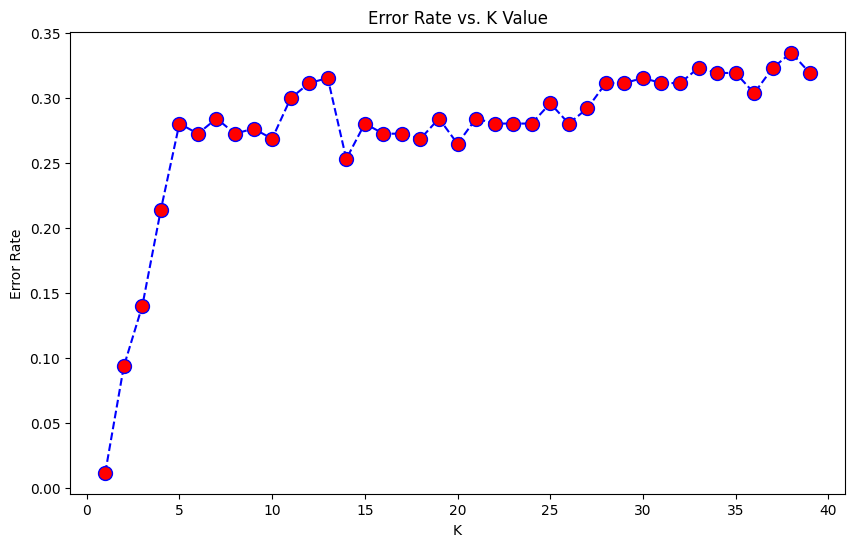

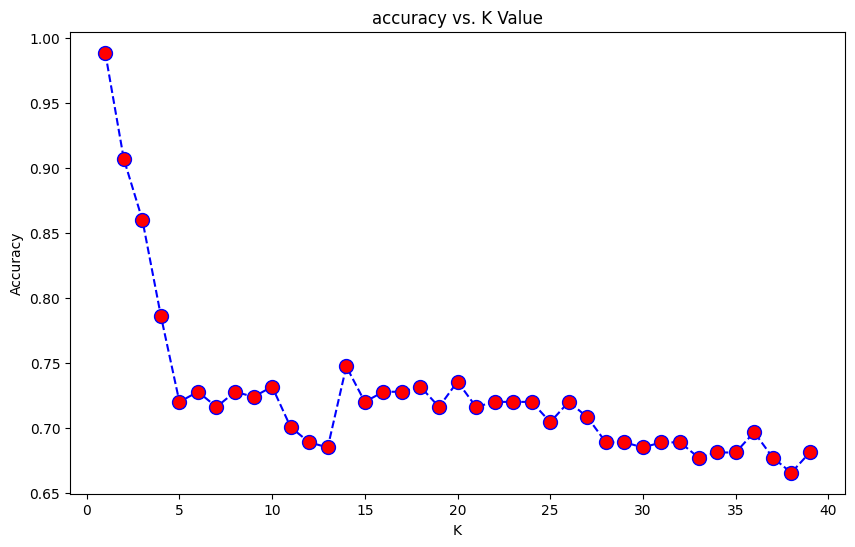

In [ ]:
# YOUR CODE HERE :  Find the Best k-value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",(error_rate.index(min(error_rate)))+1)

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",(acc.index(max(acc)))+1)



### Support Vector Machine (SVM) Algorithm ( 1 Mark)

Testing Accuracy for SVM: 0.7159533073929961
Testing Sensitivity for Random Forest: 0.7551020408163265
Testing Specificity for Random Forest: 0.6918238993710691
Testing Precision for Random Forest: 0.6016260162601627
              precision    recall  f1-score   support

         0.0       0.76      0.60      0.67       123
         1.0       0.69      0.82      0.75       134

    accuracy                           0.72       257
   macro avg       0.72      0.71      0.71       257
weighted avg       0.72      0.72      0.71       257



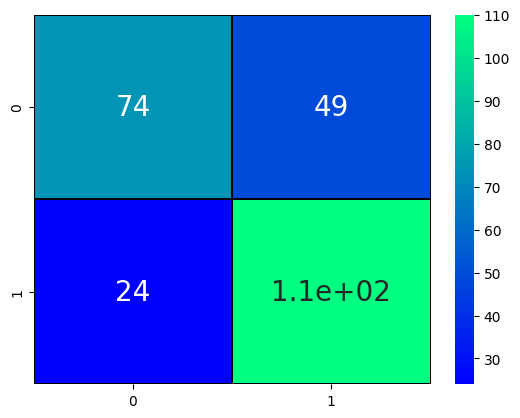

In [ ]:
# YOUR CODE HERE : Perform binary classification using the Support Vector Machine (SVM) algorithm and calculate the accuracy of the SVM model on a test dataset.
svm=SVC(C=12,kernel='linear')
model3=svm.fit(X_train,y_train)
pred3=model3.predict(X_test)
cm3= confusion_matrix(y_test,pred3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
svm_acc = accuracy_score(y_test, pred3)
fpr, tpr, thresholds = roc_curve(y_test, pred3)
roc_auc = auc(fpr, tpr)

print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

print(classification_report(y_test, pred3))

### Naive Bayes Algorithm ( 1 Mark)

Testing Accuracy for SVM: 0.8093385214007782
Testing Sensitivity for Random Forest: 0.8245614035087719
Testing Specificity for Random Forest: 0.7972027972027972
Testing Precision for Random Forest: 0.7642276422764228
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       123
         1.0       0.80      0.85      0.82       134

    accuracy                           0.81       257
   macro avg       0.81      0.81      0.81       257
weighted avg       0.81      0.81      0.81       257



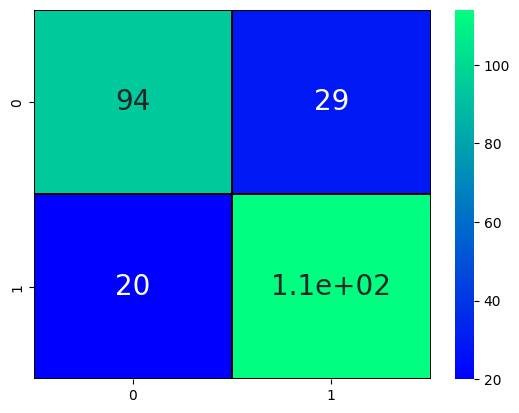

In [ ]:
# YOUR CODE HERE : Perform binary classification using the Naive Bayes algorithm and calculate the accuracy of the model on a test dataset.
model4=GaussianNB().fit(X_train,y_train)
pred4=model4.predict(X_test)
cm4= confusion_matrix(y_test,pred4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]

nb_acc = accuracy_score(y_test, pred4)
fpr, tpr, thresholds = roc_curve(y_test, pred4)
roc_auc = auc(fpr, tpr)

print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

print(classification_report(y_test, pred4))

### Decision Tree ( 1 Mark)

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       123
         1.0       0.90      0.93      0.92       134

    accuracy                           0.91       257
   macro avg       0.91      0.91      0.91       257
weighted avg       0.91      0.91      0.91       257

Testing Accuracy for Decision Tree: 0.9105058365758755
Testing Sensitivity for Decision Tree: 0.923728813559322
Testing Specificity for Decision Tree: 0.8992805755395683
Testing Precision for Decision Tree: 0.8861788617886179


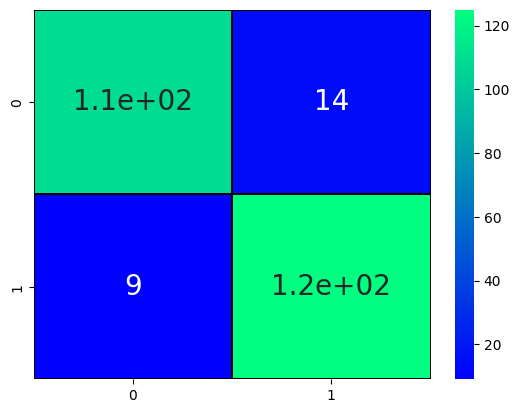

In [ ]:
# YOUR CODe HERE : Perform binary classification using the Decision Tree algorithm and calculate the accuracy of the model on a test dataset.
tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
pred5=m.predict(X_test)
cm5= confusion_matrix(y_test,pred5)
sns.heatmap(cm5, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, pred5))

TP=cm5[0][0]
TN=cm5[1][1]
FN=cm5[1][0]
FP=cm5[0][1]
tree_acc = accuracy_score(y_test, pred5)
fpr, tpr, thresholds = roc_curve(y_test, pred5)
roc_auc = auc(fpr, tpr)
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))


### Random Forest Classification ( 1 Mark)

99.22
Testing Accuracy for Random Forest: 0.9922178988326849
Testing Sensitivity for Random Forest: 0.984
Testing Specificity for Random Forest: 1.0
Testing Precision for Random Forest: 1.0
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       123
         1.0       1.00      0.99      0.99       134

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



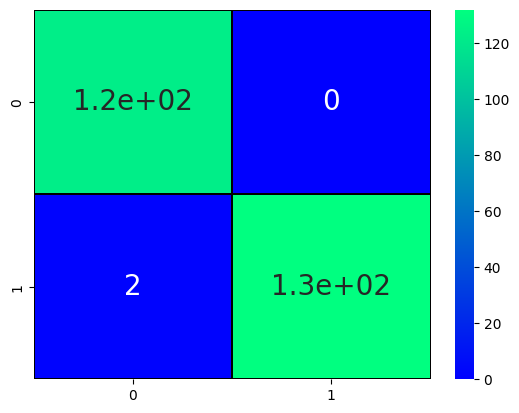

In [ ]:
# YOUR CODE HERE : Perform binary classification using the Random Forest algorithm and calculate the accuracy of the model on a test dataset.
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model6 = rfc.fit(X_train, y_train)
pred6 = model6.predict(X_test)
cm6=confusion_matrix(y_test, pred6)
sns.heatmap(cm6, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm6[0][0]
TN=cm6[1][1]
FN=cm6[1][0]
FP=cm6[0][1]
rfc_acc = accuracy_score(y_test, pred6)
fpr, tpr, thresholds = roc_curve(y_test, pred6)
roc_auc = auc(fpr, tpr)
print(round(accuracy_score(pred6,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

print(classification_report(y_test, pred6))

### Comparing Models

Text(0.5, 1.0, 'Accuracy of different models')

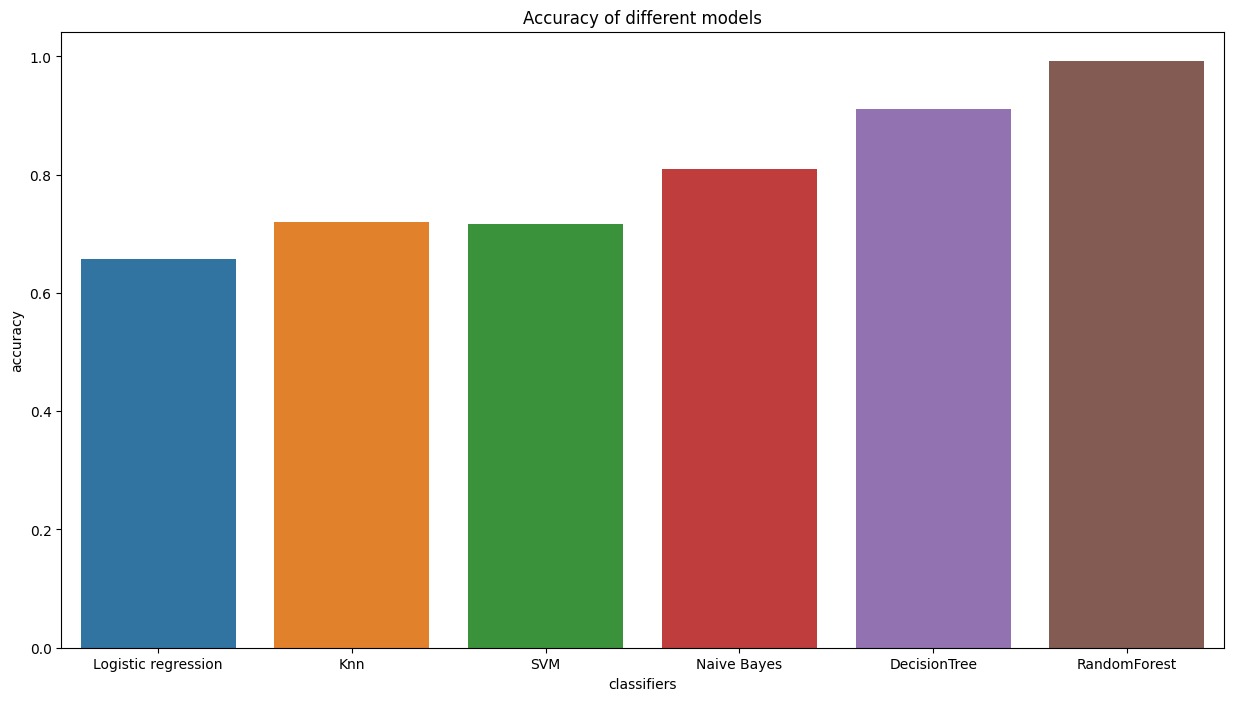

In [ ]:
 # Your Code Here : Visualize and compare the accuracy of different machine learning algorithms using a bar chart.
 fig=plt.figure(figsize=(15,8))
 classifiers=['Logistic regression','Knn','SVM','Naive Bayes','DecisionTree','RandomForest']
 Accuracy=[lr_acc,knn_acc,svm_acc,nb_acc,tree_acc,rfc_acc]
 models=[model1,model2,model3,model4,m,model6]
 sns.barplot(x=classifiers,y=Accuracy,hue=classifiers)
 plt.xlabel('classifiers')
 plt.ylabel('accuracy')
 plt.title('Accuracy of different models')



### Confusion Matrix ( 1 Mark)

Calculate confusion matrices for the predictions made by different machine learning algorithms and stores them in separate variables.

In [ ]:
cm1

array([[ 68,  55],
       [ 33, 101]])

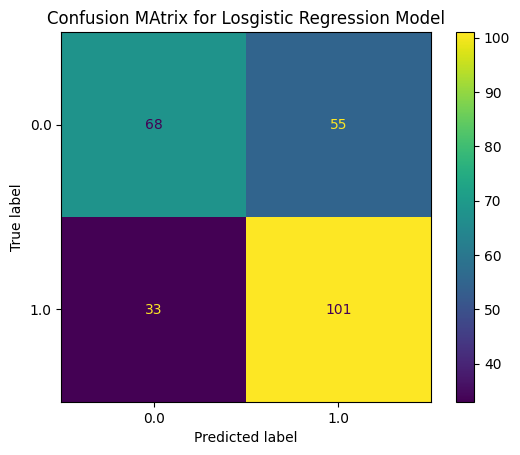

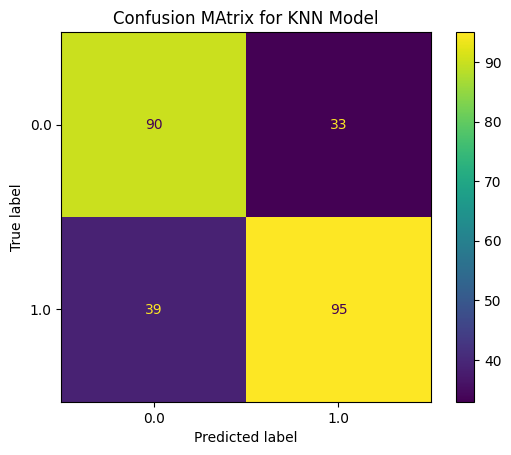

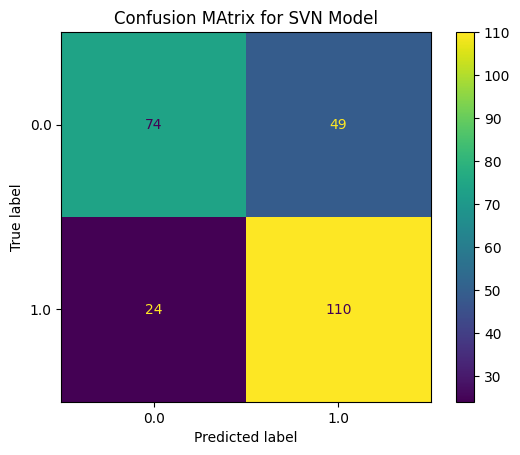

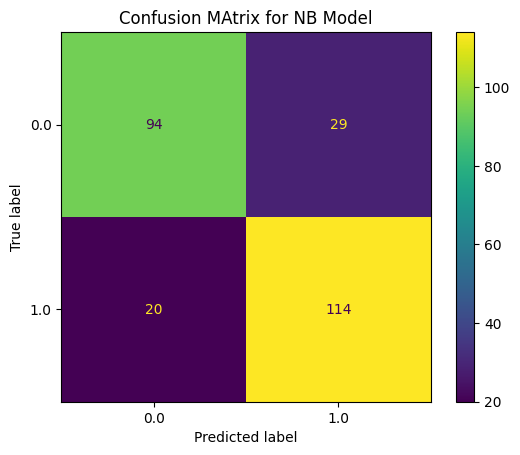

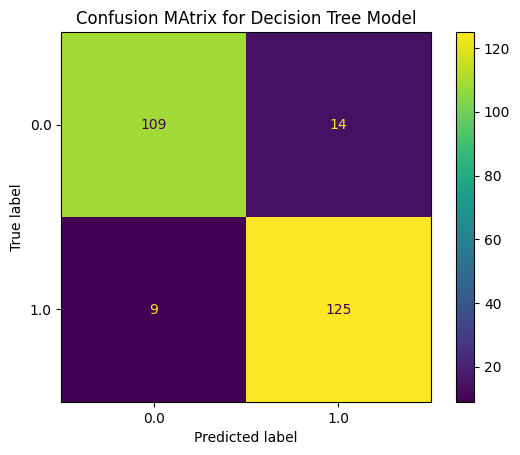

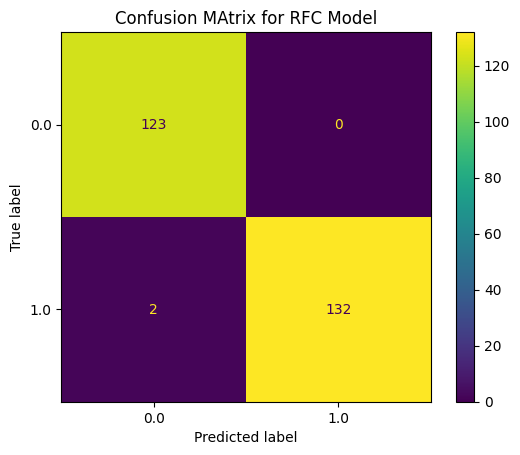

In [ ]:
# YOUR CODE HERE : Calculate confusion matrices for the predictions made by different machine learning algorithms and stores them in separate variables

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model2.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=model3.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=model4.classes_)
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=m.classes_)
disp6 = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=model6.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model1.classes_)

disp1.plot()
plt.title('Confusion MAtrix for Losgistic Regression Model')
disp2.plot()
plt.title('Confusion MAtrix for KNN Model')
disp3.plot()
plt.title('Confusion MAtrix for SVN Model')
disp4.plot()
plt.title('Confusion MAtrix for NB Model')
disp5.plot()
plt.title('Confusion MAtrix for Decision Tree Model')
disp6.plot()
plt.title('Confusion MAtrix for RFC Model')
plt.show()
